Alunos: João Gabriel Eler Mendes - RA: 2312816 Daniel Antunes de Almeida - RA: 2412786 Luiz Gustavo Silva Araujo - RA: 2313650

# **Projeto Algoritmos Genéticos**
## Problema N-rainhas
### - Posicionar as *N* rainhas no tabuleiro sem que uma elimine a outra, ou seja, as peças não podem estar na mesma linha, coluna ou diagonal.
### - Especificações:


*   Quantidade de rainhas
*   Taxas: Mutação e Cruzamento
*   Tamanhos: população, eletismo e seleção
*   Critério de parada: Número de iterações e ou solução ótima



In [1]:
from numpy.random import rand
from numpy.random import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#board graphic based on the solution
def board(solution):
    matrix = np.zeros([len(solution),len(solution)], dtype=int)
    matrix = matrix.tolist()
    for item in solution:
        for i in range(len(solution)):
            if i == item:
                for j in range(len(solution)):
                    if  j == solution.index(item):
                        matrix[i][j] = 1
                        
    l =[]
    for i in range(1, len(solution)+1):
        l.append(i)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, linewidths=.8,cbar=False,cmap='Set3',xticklabels=l,yticklabels=l)

In [3]:
#População gerada aleatoriamente
# size: tamanho do cromossomo
def random_chromosome(size):
    return [ random.randint(1, size) for _ in range(size) ]

In [4]:
# Geração de valores aleatórios para teste
# individual: Um cromossomo qualquer da população
# Função objetivo: número de pares de rainhas não-atacantes
# Exemplo: 8 rainhas 
# min = 0, max = 8 x 7/2 = 28
#crete neighbor function
    
def fitness(individual):
    h = 0 
    size = len(individual)
    for i in range(0, size):
      for j in range(i+1, size):  # iniciar j em i+1 para nao repetir pares
        # checar ataques 
        if abs(i - j) == abs(individual[i] - individual[j]) or individual[i] == individual[j] or abs(individual[i] - individual[j]) == 0:
          break  # parar loop interno pois ataque foi descoberto
        else:  # se o loop nao quebrar
          h += 1  # um par nao atacante adicionado
    return h

In [5]:
# Seleção por torneio
# population: População atual
# sizek: tamanho do torneio
def selection(pop, k):
  selection_ix = randint(len(pop)) #seleciona um individuo aleatório
  for ix in randint(0, len(pop), k - 1):
    if pop[ix][1] > pop[selection_ix][1]: #checa se o individuo pop é melhor ou pior que o pre-selecionado
      selection_ix = ix 
  return pop[selection_ix][0] #retorna o melhor individuo encontrado

In [6]:
#Cruzamento de 1 ponto aleatório
# p1 e p2: dois individuos da população
# r_cross: Taxa de cruzamento
def crossover(p1, p2, r_cross):
  # children are copies of parents by default
  c1, c2 = p1.copy(), p2.copy()
  # check for recombination
  if rand() < r_cross:
    # select crossover point that is not on the end of the string
    pt = randint(1, len(p1) - 1)
    # perform crossover
    # Concatenation between p1 and p2
    c1 = p1[:pt] + p2[pt:] 
    c2 = p2[:pt] + p1[pt:]
  return [c1, c2]

In [7]:
# Mutação bit a bit
# individual: Um cromossomo qualquer da população
# r_mut: Taxa de mutação
def mutation(individual, r_mut):
  for i in range(len(individual)):
    if rand() < r_mut:
      temp = randint(1, len(individual))
      if temp in individual:
          ix = individual.index(temp)
          individual[ix], individual[i] = individual[i], individual[ix]
      else:
          individual[i] = temp

In [8]:
# Elitismo
#pop: População atual
#best_ind: Melhores individuos selecionados 
#          (tamanho definido por parâmetro)
# ... Se for necessário mais parâmetros

def elitism(pop, elitism_rate):
    sorted_pop = sorted(pop, key=lambda x: x[1], reverse=True)
    elitism_count = int(len(sorted_pop) * elitism_rate)
    elite_pop = [list(individual[0]) for individual in sorted_pop[:elitism_count]]
    return elite_pop 

In [77]:
# Poderá ser utlizado qualquer quantidade de parâmetros
def genetic_algorithm(nqueens, tam_pop, n_iter, r_cross, r_mut, k, elitism_rate):
  # Pop: data structure used:
  ##### index [0] -> number of bits (0,1)
  ##### index [1] -> fitness
  pop = list()
  perfect = list()
  max = int(nqueens * (nqueens - 1)/2)

  # initial temp population with random bitstring
  tempPop = [random_chromosome(nqueens) for _ in range(tam_pop)]
  # keep track of best solution
  best_eval = fitness(tempPop[0])
  # enumerate generations
  for gen in range(n_iter):
    # Clear for new generation
    pop.clear()
    # evaluate all candidates in the population
    scores = [fitness(p) for p in tempPop]
    for i in range(len(scores)):
      if scores[i] == max and tempPop[i] not in perfect:
        if len(perfect) < tam_pop:
          perfect.append(tempPop[i])
    # Concatenate with pop
    for i in zip(tempPop, scores):
      pop.append(list(i))
    elite_pop = elitism(pop, elitism_rate)
    for i in range(tam_pop):
      if scores[i] > best_eval:
        best_eval = pop[i][1]
      selected = [selection(pop, k) for _ in range(tam_pop)] #lista com o melhor cromossomo da pop x10
      children = list()
      children.append(elite_pop[0])
      for i in range(0, tam_pop, 2):
        # get selected parents in pairs
        p1, p2 = selected[i], selected[i + 1]
        # crossover and mutation
        for c in crossover(p1, p2, r_cross):
          # mutation in each children from p1 and p2
          mutation(c, r_mut)
          # store for next generation
          children.append(c)
          # replace population
      tempPop = children
  for i in range(len(perfect)):
    if perfect[i] not in tempPop:
      if fitness(tempPop[i]) < fitness(perfect[i]):
        tempPop[i] = perfect[i]
  scores = [fitness(p) for p in tempPop]
  return zip(tempPop, scores)


In [10]:
#Funcao para gerar um tabuleiro informar os cromossomos gerados
def print_population(pop):
    for i in pop:
      print("Cromossomo: ",i[0]," - Fit: ",i[1])
      if i[1] == 28:
        board(i[0]) #se a solucao for correta gera o tabuleiro

[3, 5, 2, 8, 1, 7, 4, 6]
[8, 2, 5, 3, 1, 7, 4, 6]
[3, 5, 8, 4, 1, 7, 2, 6]
[3, 7, 2, 8, 5, 1, 4, 6]
[3, 5, 2, 8, 6, 4, 7, 1]
Cromossomo:  [3, 5, 2, 8, 1, 7, 4, 6]  - Fit:  28
Cromossomo:  [8, 2, 5, 3, 1, 7, 4, 6]  - Fit:  28
Cromossomo:  [3, 5, 8, 4, 1, 7, 2, 6]  - Fit:  28
Cromossomo:  [3, 7, 2, 8, 5, 1, 4, 6]  - Fit:  28
Cromossomo:  [3, 5, 2, 8, 6, 4, 7, 1]  - Fit:  28
Cromossomo:  [3, 1, 8, 4, 7, 6, 2, 5]  - Fit:  18
Cromossomo:  [3, 5, 2, 8, 1, 7, 2, 6]  - Fit:  26
Cromossomo:  [3, 5, 2, 8, 1, 7, 4, 6]  - Fit:  28
Cromossomo:  [8, 5, 2, 4, 1, 7, 3, 6]  - Fit:  26
Cromossomo:  [3, 5, 2, 8, 1, 7, 4, 6]  - Fit:  28
Cromossomo:  [3, 5, 2, 8, 1, 7, 4, 6]  - Fit:  28


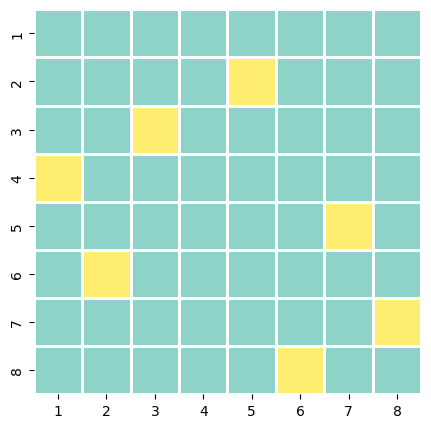

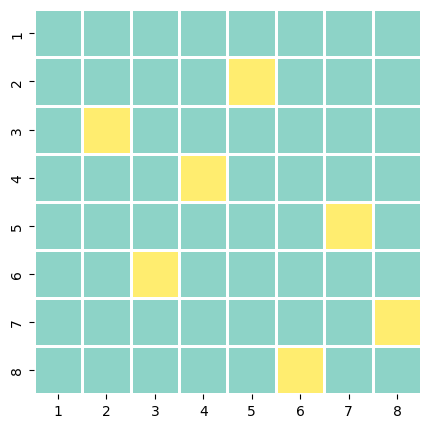

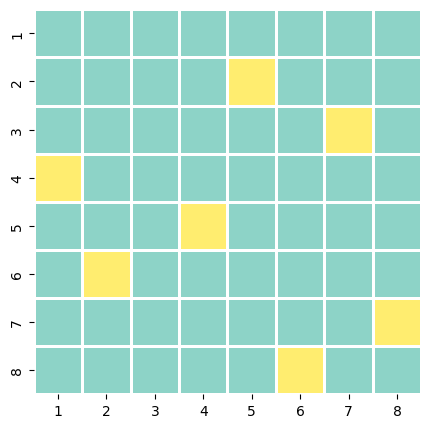

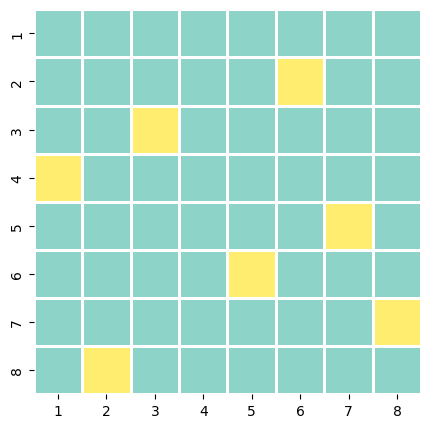

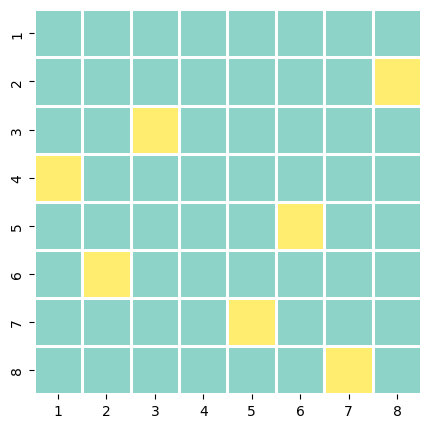

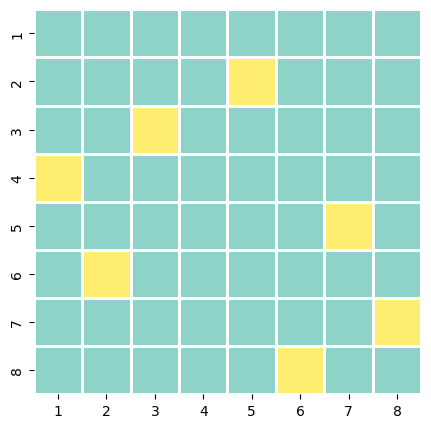

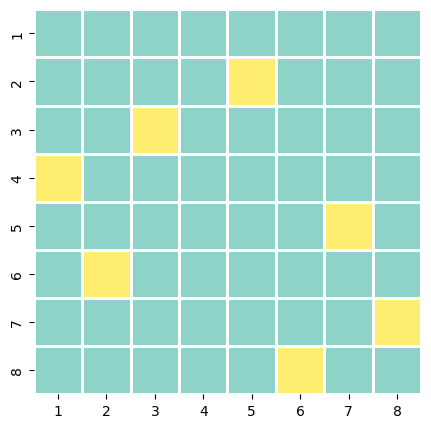

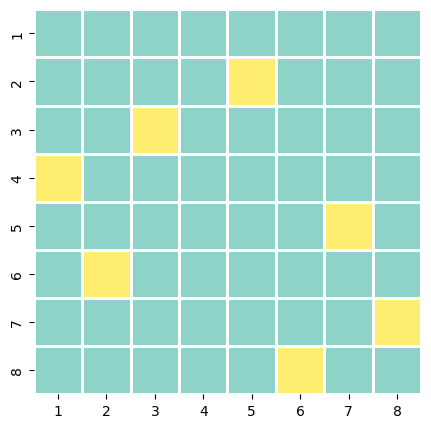

In [76]:
#populacao/cromossomo
pop = []
#numero de iteracoes
n_iter = 100
#taxa de cruzamento
r_cross = 0.9
#
elitism_rate = 0.7
#taxa de mutacao
r_mut = 0.2
#selecao por torneio
k = 20
#tamanho da populacao
tam_pop = 10
#numero de rainhas
nqueens = 8
#sequence = [random_chromosome(nqueens) for _ in range(tam_pop)]
pop = genetic_algorithm(nqueens, tam_pop, n_iter, r_cross, r_mut, k, elitism_rate)
#fit = [fitness(chrom) for chrom in sequence]

#for i in zip(sequence,fit):
#  pop.append(list(i))  

print_population(pop)

In [ ]:
pop
